## 1. Import Data & Libraries

In [1]:
#Import the necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.base import TransformerMixin
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from pandas.plotting import scatter_matrix
from tensorflow import keras
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, cross_val_predict


#Underated: import dtale

In [2]:
# Load the data
df = pd.read_csv('Spotify.csv') 

/var/folders/7f/xrny7_8d32q6xy6nps28xn8m0000gn/T/ipykernel_37091/393113494.py:2: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Spotify.csv')


In [3]:
# Check the few rows of the data
df.head()

,track_id,name,album,artist_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature;;;
0,0fLGrGCrbziOu3dnjQMCWS,PANDEMONIUM,HOPE,NF,63.0,0.847,0.714,4.0,-4.420,0.0,0.1150,0.4400,0.000000,0.271,0.302,98.996,197007,3;;;
1,5rLyYxZNzca00ENADO9m54,When I Grow Up,The Search,NF,72.0,0.817,0.814,2.0,-3.985,1.0,0.1850,0.3200,0.000000,0.152,0.247,109.994,196800,4;;;
2,1mvI5pGoh84IiFSbWxEkGH,CLOUDS,CLOUDS (THE MIXTAPE),NF,65.0,0.788,0.652,1.0,-3.931,1.0,0.4050,0.3730,0.000000,0.755,0.812,128.108,243760,4;;;
3,7yNgSAuwbDJcdRNrBDtKPq,WHY,The Search,NF,60.0,0.741,0.827,10.0,-6.343,0.0,0.5490,0.4510,0.000000,0.292,0.418,158.317,187933,4;;;
4,7EQBIAZHD2QAh9sgtjZJgI,Wait,Mansion,NF,52.0,0.614,0.724,7.0,-4.945,0.0,0.0377,0.0134,0.000001,0.121,0.176,128.018,242000,4;;;


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129216 entries, 0 to 129215
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   track_id           129216 non-null  object 
 1   name               122010 non-null  object 
 2   album              121952 non-null  object 
 3   artist_name        121924 non-null  object 
 4   popularity         121948 non-null  float64
 5   danceability       121948 non-null  float64
 6   energy             121948 non-null  float64
 7   key                121948 non-null  float64
 8   loudness           121948 non-null  float64
 9   mode               121948 non-null  float64
 10  speechiness        121948 non-null  float64
 11  acousticness       121948 non-null  float64
 12  instrumentalness   121948 non-null  float64
 13  liveness           121948 non-null  float64
 14  valence            121948 non-null  float64
 15  tempo              121948 non-null  object 
 16  du

### Let's take an inventory of what data types we have, before we think about removing any columns: 

Numerical 
- Discrete
- Continuous

Categorical
- Ordinal
- Nominal
- Binary

Other
- Date/Time (time-stamps)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129216 entries, 0 to 129215
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   track_id           129216 non-null  object 
 1   name               122010 non-null  object 
 2   album              121952 non-null  object 
 3   artist_name        121924 non-null  object 
 4   popularity         121948 non-null  float64
 5   danceability       121948 non-null  float64
 6   energy             121948 non-null  float64
 7   key                121948 non-null  float64
 8   loudness           121948 non-null  float64
 9   mode               121948 non-null  float64
 10  speechiness        121948 non-null  float64
 11  acousticness       121948 non-null  float64
 12  instrumentalness   121948 non-null  float64
 13  liveness           121948 non-null  float64
 14  valence            121948 non-null  float64
 15  tempo              121948 non-null  object 
 16  du

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129216 entries, 0 to 129215
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   track_id           129216 non-null  object 
 1   name               122010 non-null  object 
 2   album              121952 non-null  object 
 3   artist_name        121924 non-null  object 
 4   popularity         121948 non-null  float64
 5   danceability       121948 non-null  float64
 6   energy             121948 non-null  float64
 7   key                121948 non-null  float64
 8   loudness           121948 non-null  float64
 9   mode               121948 non-null  float64
 10  speechiness        121948 non-null  float64
 11  acousticness       121948 non-null  float64
 12  instrumentalness   121948 non-null  float64
 13  liveness           121948 non-null  float64
 14  valence            121948 non-null  float64
 15  tempo              121948 non-null  object 
 16  du

In [7]:
df.select_dtypes(['object', 'bool'])

,track_id,name,album,artist_name,tempo,duration_ms,time_signature;;;
0,0fLGrGCrbziOu3dnjQMCWS,PANDEMONIUM,HOPE,NF,98.996,197007,3;;;
1,5rLyYxZNzca00ENADO9m54,When I Grow Up,The Search,NF,109.994,196800,4;;;
2,1mvI5pGoh84IiFSbWxEkGH,CLOUDS,CLOUDS (THE MIXTAPE),NF,128.108,243760,4;;;
3,7yNgSAuwbDJcdRNrBDtKPq,WHY,The Search,NF,158.317,187933,4;;;
4,7EQBIAZHD2QAh9sgtjZJgI,Wait,Mansion,NF,128.018,242000,4;;;
...,...,...,...,...,...,...,...
129211,2QSD3K3b3BJ8DPhGhQfDPW,Into The Valley,Scared To Dance,Skids,144.815,199467,4;;;
129212,49XnDVsYOHgV4gFZeCojKj,Tonight's Da Night,Whut? The Album,Redman,181.121,201800,4;;;
129213,5Y9IIH8Xmo1nuk0gfFjc4Q,Figure 8,M3LL155X,FKA twigs,119.964,183040,4;;;
129214,0ya0JYEFoXNviB8RMeHDtW,Like An Angel,Rollercoaster - The Best Of 1986-1989,The Mighty Lemon Drops,149.24,222160,4;;;


In [8]:
df.nunique()

track_id             95469
name                 69109
album                49740
artist_name          25678
popularity             123
danceability          1135
energy                2346
key                     23
loudness             18626
mode                    26
speechiness           1415
acousticness          4821
instrumentalness      5361
liveness              1727
valence               1778
tempo                64109
duration_ms          56650
time_signature;;;        9
dtype: int64

In [9]:
df.select_dtypes(['float', 'int'])

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
0,63.0,0.847,0.714,4.0,-4.420,0.0,0.1150,0.440000,0.000000,0.2710,0.302
1,72.0,0.817,0.814,2.0,-3.985,1.0,0.1850,0.320000,0.000000,0.1520,0.247
2,65.0,0.788,0.652,1.0,-3.931,1.0,0.4050,0.373000,0.000000,0.7550,0.812
3,60.0,0.741,0.827,10.0,-6.343,0.0,0.5490,0.451000,0.000000,0.2920,0.418
4,52.0,0.614,0.724,7.0,-4.945,0.0,0.0377,0.013400,0.000001,0.1210,0.176
...,...,...,...,...,...,...,...,...,...,...,...
129211,43.0,0.332,0.707,7.0,-12.698,1.0,0.0361,0.000012,0.006120,0.1100,0.652
129212,0.0,0.464,0.749,6.0,-8.564,1.0,0.4800,0.224000,0.000046,0.3510,0.879
129213,0.0,0.694,0.710,2.0,-9.793,1.0,0.3400,0.527000,0.001350,0.0697,0.415
129214,0.0,0.332,0.800,1.0,-9.746,1.0,0.0326,0.000368,0.001600,0.0850,0.832


## Just tempo and duration
Numerical 
- Discrete: album_popularity, total_tracks, track_number, artist_popularity, followers, rn, key
- Continuous: duration_sec, acousticness, danceability, duration_ms, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature, valence, track_popularity

Categorical
- Ordinal: None
- Nominal: album_id, album_type, artists, artist_0, artist_1, artist_2, artist_3, artist_4, artist_id, label, track_id, track_name, artist_genres, name, genre_0, genre_1, genre_2, genre_3, genre_4, analysis_url, track_href, type, uri, 
- Binary: explicit, mode

Other
- Date/Time (time-stamps): release_date, release_month, release_year


In [10]:
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce')
df['duration_ms'] = pd.to_numeric(df['duration_ms'], errors='coerce')

#### 1. Study some attributes and their characterists:

In [11]:
## Check for duplicates in the data (row)
duplicates = df.duplicated()

# Print the number of duplicate rows
print("Number of duplicate rows = ", duplicates.sum())

Number of duplicate rows =  33136


It looks like we do have some duplicates, but before we remove theese, let's take a look at the number of missing values

In [12]:
#Let's start by looking at the number of missing values
missing_data = df.isna().sum() / len(df) * 100
missing_data

track_id             0.000000
name                 5.576709
album                5.621595
artist_name          5.643264
popularity           5.624690
danceability         5.624690
energy               5.624690
key                  5.624690
loudness             5.624690
mode                 5.624690
speechiness          5.624690
acousticness         5.624690
instrumentalness     5.624690
liveness             5.624690
valence              5.624690
tempo                5.633977
duration_ms          5.644812
time_signature;;;    5.644812
dtype: float64

We will proceed to remove thoose that conntains above 30 % missing values

In [13]:
# Drop the rest of the rows
df2 = df.dropna(axis=0)

In [14]:
#Let's see which columns we have left
df2.isna().sum()

track_id             0
name                 0
album                0
artist_name          0
popularity           0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature;;;    0
dtype: int64

In [15]:
df2.columns

Index(['track_id', 'name', 'album', 'artist_name', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature;;;'],
      dtype='object')

In [16]:
print("original df:", df.shape,"\n""\n" ,"new data frame:", df2.shape)

original df: (129216, 18) 

 new data frame: (121898, 18)


In [17]:
#Let's start by looking at the summary of our numerical attributes:
df2.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,121898.000000,121898.000000,121898.000000,121898.000000,121898.000000,121898.000000,121898.000000,121898.000000,121898.000000,121898.000000,121898.000000,121898.000000,1.218980e+05
mean,38.935905,0.600196,0.641328,5.260414,-8.180825,0.613997,0.090172,0.253498,0.135471,0.186341,0.501113,121.027091,2.223769e+05
std,28.187356,0.174759,0.227557,3.588927,5.072532,0.486833,0.093510,0.297959,0.288662,0.150564,0.249611,28.338204,7.940176e+04
min,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.002700e+04
25%,10.000000,0.488000,0.510000,2.000000,-9.603000,0.000000,0.036400,0.019800,0.000000,0.095400,0.303000,99.584000,1.770930e+05
50%,42.000000,0.618000,0.678000,5.000000,-6.916000,1.000000,0.051000,0.117000,0.000045,0.124000,0.501000,120.081000,2.111105e+05
75%,62.000000,0.731000,0.816000,8.000000,-5.158000,1.000000,0.097000,0.403000,0.025600,0.234000,0.701000,138.079000,2.501730e+05
max,100.000000,0.990000,1.000000,11.000000,2.006000,1.000000,0.956000,0.996000,1.000000,0.997000,1.000000,241.426000,5.112390e+06


In [18]:
df2[['popularity']].describe()

df2.shape



(121898, 18)

In [19]:
df2[['popularity']].describe()


,popularity
count,121898.000000
mean,38.935905
std,28.187356
min,0.000000
25%,10.000000
50%,42.000000
75%,62.000000
max,100.000000


In [20]:
columns_to_log = ['popularity']

df2 = df2[(df2[columns_to_log] != 0).all(axis=1)]

df2 = df.dropna(axis=0)

df3 = df2[(df2[columns_to_log] != 0).all(axis=1)]


Given that the 75th percentile is at 15 and the maximum is 99, it seems like there might be a significant number of tracks with very high popularity.

#### Interpretation
Range of values: 
- album_popularity ranges from 0 to 100, duration_sec ranges from about 3 seconds to 5280 seconds (or about 1.5 hours), and followers ranges from 0 to over 116 million.

Mean and median: 
- The average album_popularity is about 17.14, but the median is only 8, suggesting a skewed distribution with some albums having very high popularity.

Standard deviation: 
- artist_popularity has a standard deviation of about 26.25, indicating a wide spread of popularity levels among artists.

Quartiles: 
- For danceability, 25% of tracks have a score below 0.452, 50% have a score below 0.598, and 75% have a score below 0.714.

Zero values: 
- Some features like acousticness, danceability, energy, liveness, loudness, speechiness, valence, and track_popularity have a minimum value of 0, which might represent missing or undefined data.

artist_popularity:
- The average popularity of an artist is around 29.32, with a standard deviation of 26.25. This means that artist popularity varies quite a bit. 
- The minimum popularity is 0, and the maximum is 100. The median popularity (50th percentile) is 24, which is lower than the mean, suggesting a right-skewed distribution.

followers: 
- The average number of followers is approximately 2.29 million, but the standard deviation is quite large (around 9.64 million), indicating a wide range of follower counts. 
- The median number of followers is only 3,512, suggesting a few artists with a very high number of followers are pulling the mean up, i.e., the distribution is heavily right-skewed. 
- The maximum number of followers is around 116 million.

track_popularity: 
- The average track popularity is around 10.28, with a standard deviation of 15.64, indicating a wide range of popularity scores. 
- The minimum popularity is 0, and the maximum is 99. 
- The median popularity is 2, which is much lower than the mean, suggesting a few tracks with very high popularity are pulling the mean up, i.e., the distribution is heavily right-skewed.
- track_popularity is a continuous numerical attribute. It ranges from 0 to 99 as per the data you provided => good for stratifying maybe

## Visualize the data

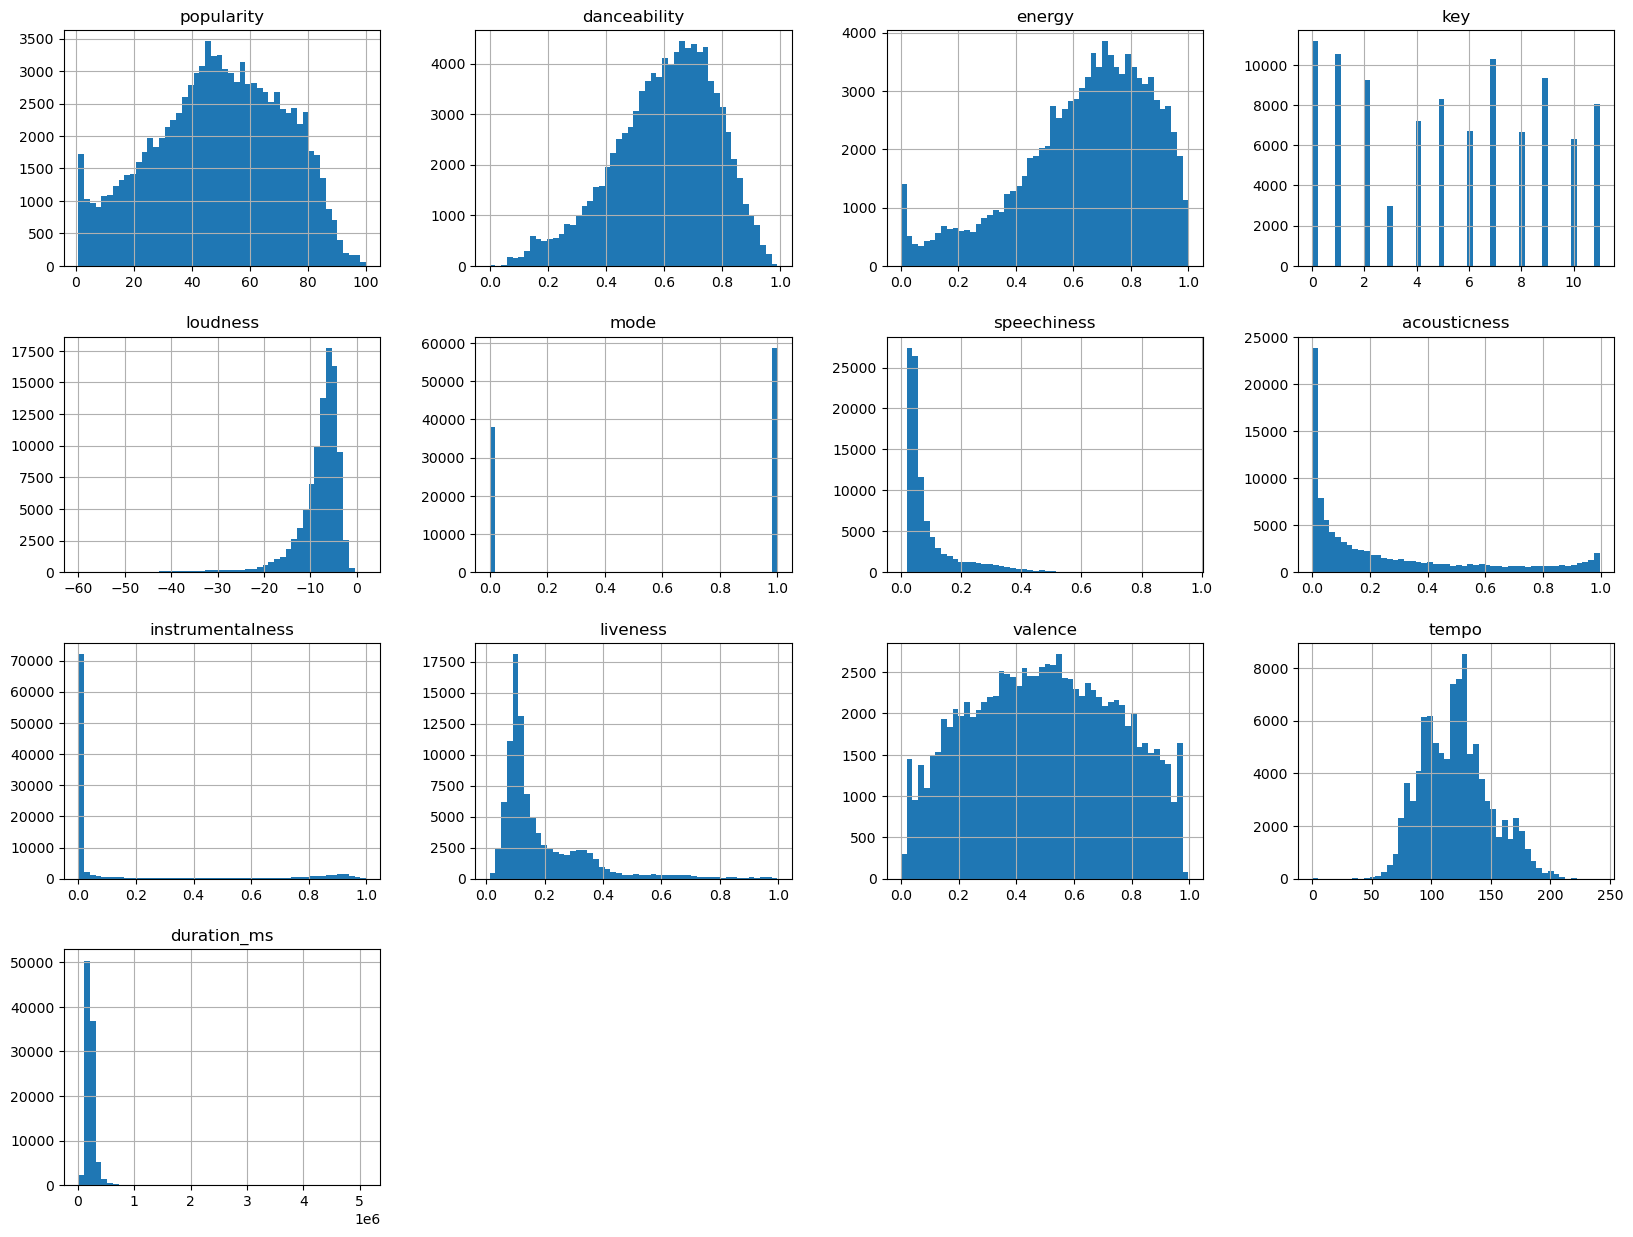

In [21]:
# let's take a further look at Noisness and type of noise (Stochastic, outliers, rounidng errors, etc.)
# Type of distribution (Gaussian, uniform, logaritmic)
df3.hist(bins=50, figsize=(20,15))
plt.show()

In [22]:
df3.shape

(96737, 18)

In [23]:
df3.isna().sum()

track_id             0
name                 0
album                0
artist_name          0
popularity           0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature;;;    0
dtype: int64

In [24]:
df3['popularity'].describe()

count    96737.000000
mean        49.063016
std         22.456882
min          1.000000
25%         33.000000
50%         50.000000
75%         67.000000
max        100.000000
Name: popularity, dtype: float64

In [25]:
df3['popularity'] = pd.cut(df3['popularity'], bins=[-1, 64, 100], labels=[0, 1]).astype(int)

/var/folders/7f/xrny7_8d32q6xy6nps28xn8m0000gn/T/ipykernel_37091/2257666348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['popularity'] = pd.cut(df3['popularity'], bins=[-1, 64, 100], labels=[0, 1]).astype(int)


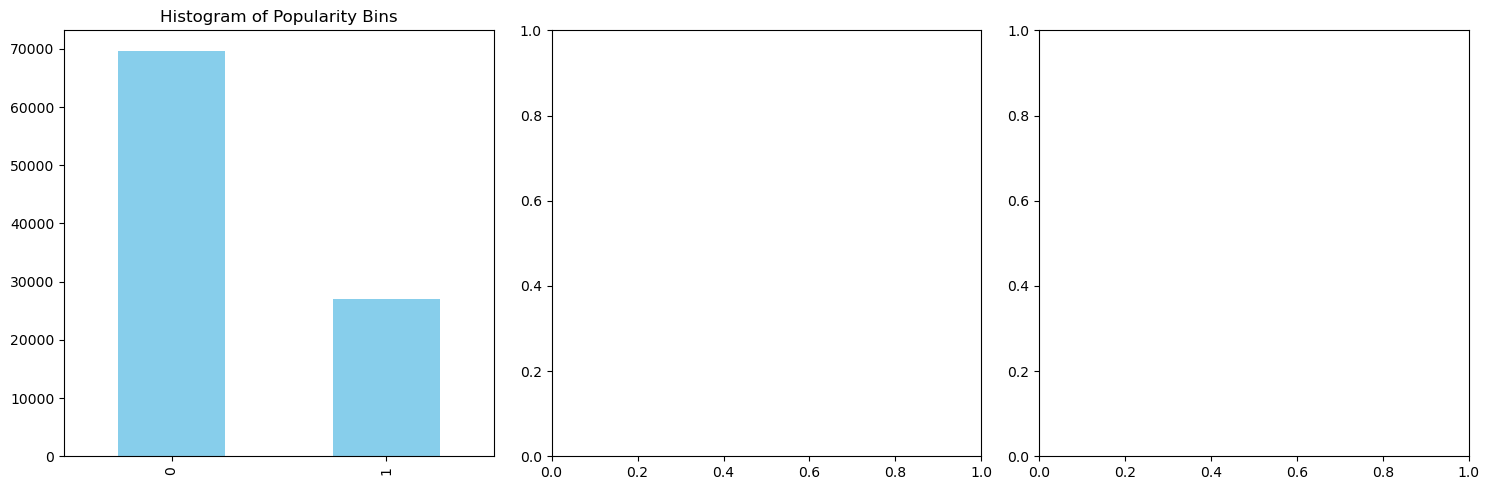

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

df3['popularity'].value_counts().sort_index().plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Histogram of Popularity Bins')

plt.tight_layout()
plt.show()

In [27]:
print(df3['popularity'].unique())

[0 1]


In [28]:
numeric_columns = df3.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df3[numeric_columns]

X = numeric_df.drop(columns=['popularity'])
y = numeric_df['popularity']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size=0.3, random_state=42)

# Fit a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get the feature importances from the Random Forest model
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)
print("Feature importances from Random Forest:")
print(importance_df)

# Get permutation importance
perm_importance = permutation_importance(model, X_test, y_test, random_state=42)
perm_importance_df = pd.DataFrame({'feature': feature_names, 'importance': perm_importance.importances_mean}).sort_values('importance', ascending=False)
print("\nPermutation importances:")
print(perm_importance_df)

Feature importances from Random Forest:
             feature  importance
7   instrumentalness    0.118628
3           loudness    0.117711
0       danceability    0.093736
1             energy    0.093042
5        speechiness    0.092051
10             tempo    0.091908
11       duration_ms    0.089860
8           liveness    0.086650
9            valence    0.086636
6       acousticness    0.081845
2                key    0.039765
4               mode    0.008170

Permutation importances:
             feature  importance
3           loudness    0.476524
7   instrumentalness    0.331478
0       danceability    0.295955
1             energy    0.295092
5        speechiness    0.202451
11       duration_ms    0.170925
9            valence    0.114228
8           liveness    0.107020
10             tempo    0.101061
6       acousticness    0.094639
2                key    0.035482
4               mode    0.003902


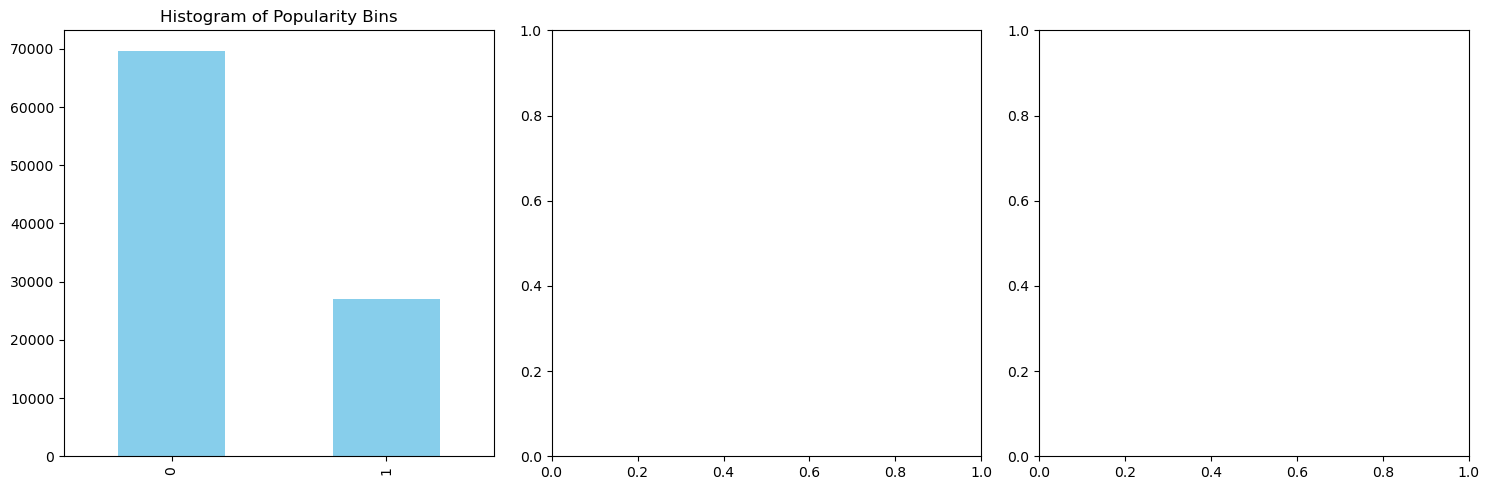

In [30]:
# Assuming df is your DataFrame with the binned columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot histogram for artist_popularity_bins
df3['popularity'].value_counts().sort_index().plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Histogram of Popularity Bins')

plt.tight_layout()
plt.show()


In [31]:
numeric_df.nunique().keys()


Index(['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')

## Identify target attributes:

In [32]:
target_df2 = numeric_df[['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'duration_ms',
       'valence']].copy()

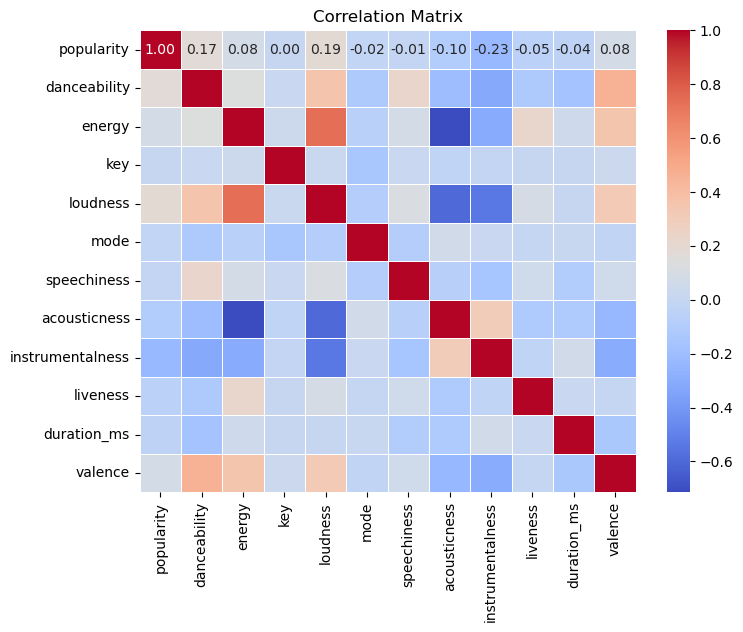

In [33]:
corr_matrix = target_df2.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [34]:
X_train.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [35]:
X_train.shape

(67715, 12)

In [36]:
print(y_train.name)
print(y_train.shape)

popularity
(67715,)


In [37]:
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
16859,0.801,0.960,8.0,-5.534,1.0,0.2640,0.028400,0.877000,0.0985,0.101,126.045,217411.0
39261,0.821,0.630,2.0,-7.126,1.0,0.2930,0.047600,0.000025,0.0707,0.467,133.175,177519.0
7458,0.425,0.839,6.0,-12.391,0.0,0.0385,0.000007,0.816000,0.4330,0.705,109.575,418707.0
123755,0.860,0.307,3.0,-13.644,1.0,0.0552,0.968000,0.002670,0.2200,0.964,114.806,163560.0
81834,0.692,0.651,9.0,-8.267,1.0,0.0324,0.292000,0.002410,0.1050,0.706,97.923,254560.0


In [38]:
y_train.describe()

count    67715.000000
mean         0.279451
std          0.448733
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: popularity, dtype: float64

## Detecting outliers

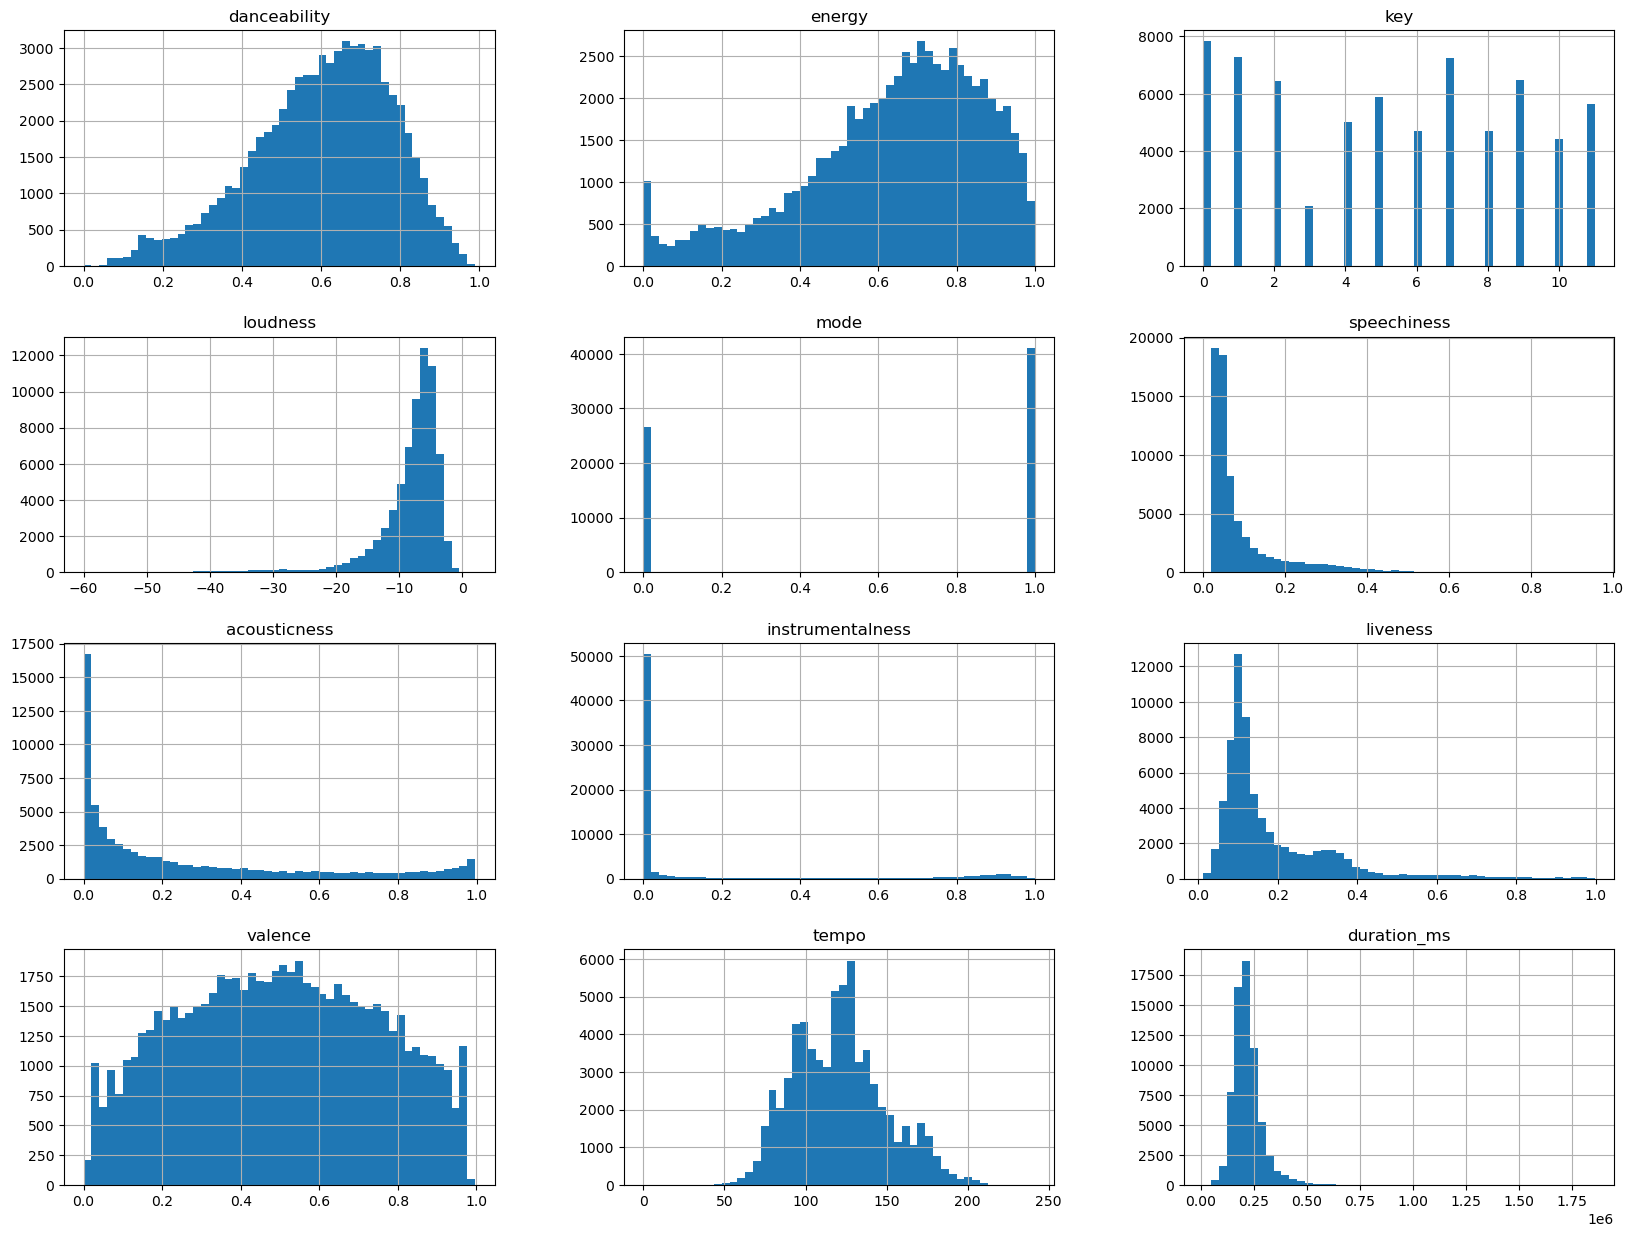

In [39]:
# let's take a further look at Noisness and type of noise (Stochastic, outliers, rounidng errors, etc.)
X_train.hist(bins=50, figsize=(20,15))
plt.show()

Right Skew (Heavy Tail to the Right):

- album_popularity, artist_popularity, followers, speechiness, liveness, and duration_sec are right-skewed. 

- These distributions have a majority of their data points on the left, with a tail extending towards the right.

- Solution: For these right-skewed distributions, we can apply a logarithmic transformation to reduce the skewness. This can be done using the np.log1p function which applies log(1 + x) to all elements of the column. This transformation can squash these values into a smaller range.


Left Skew (Heavy Tail to the Left):
- loudness is left-skewed, meaning most songs have a low loudness value, but a few songs have a high loudness value. 

- For left-skewed data, we might want to consider a different transformation that can make the distribution more symmetrical. One common method is to apply a power transformation (also known as a Box-Cox transformation) that raises the values to a small power. This can often help in reducing left skewness.

Multimodal Distributions:

- tempo is an evident example of a multimodal distribution. It has two clear peaks indicating that there are some groups of tracks; groups with lower tempo and others with higher tempo.

- For multimodal distributions like tempo, we can create buckets or bins for each mode and then apply one-hot encoding to these buckets. This can be done using the pandas.cut function to create the buckets and OneHotEncoder from sklearn to apply the one-hot encoding.

Generally, there seems to be many outliers, let's use a boxplot and test for this


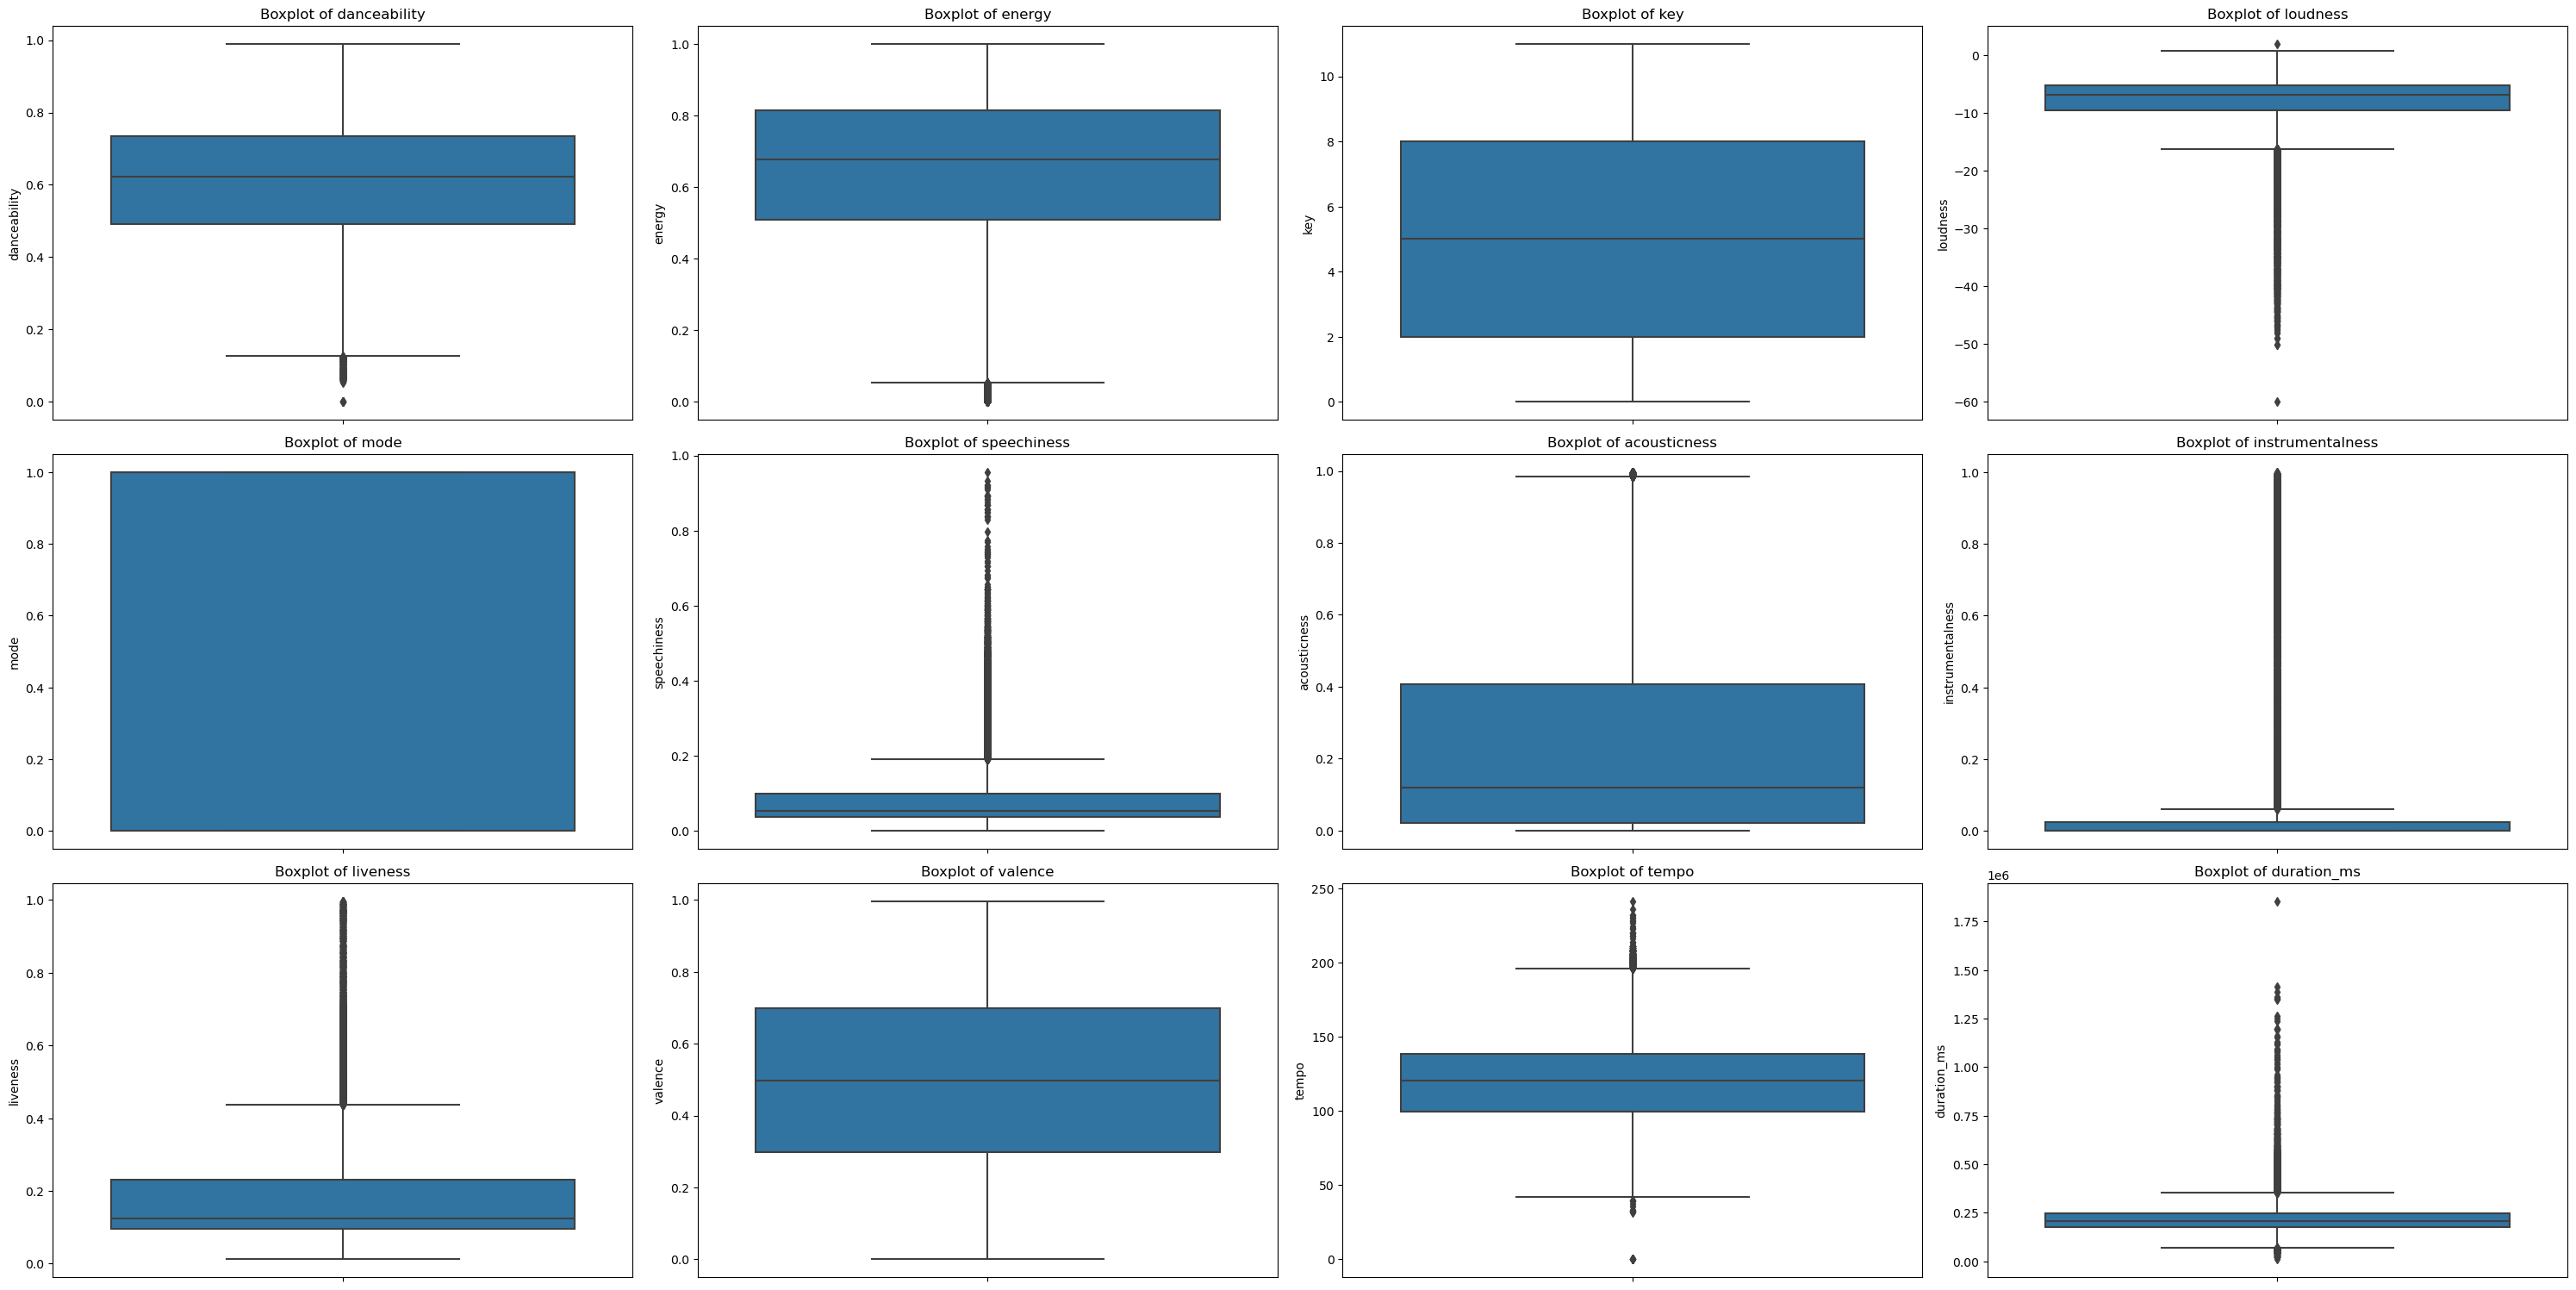

In [40]:
# Get the list of numeric features (column names) in X_train
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Create a figure
plt.figure(figsize=(30, 20))

# Create a boxplot for each numeric feature
for i, feature in enumerate(numeric_features):
    plt.subplot(len(numeric_features)//4+1, 4, i+1)  # Create a new subplot
    sns.boxplot(data=X_train, y=feature)  # Create a boxplot with seaborn
    plt.title(f'Boxplot of {feature}')  # Set the title

# Improve layout
plt.tight_layout()
plt.show()

The 1.5 IQR rule is a common method for identifying outliers in a dataset. 

The Interquartile Range (IQR) is a measure of statistical dispersion, being equal to the difference between the upper and lower quartiles, Q3 and Q1 respectively.

The rule states that:
Anything above
- Q3+1.5×IQR

Anything below
- Q1−1.5×IQR

is considered an outlier.

Now we do have some outliers let's just test and see how much data is removed before we apply our transformation pipeline

In [41]:
# Create a copy of the DataFrame
X_train_copy = X_train.copy()

features = X_train.select_dtypes(include=[np.number]).columns.tolist()

for x in features:
    q75, q25 = np.percentile(X_train_copy.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    # Replace data points that lie outside of the lower and the upper bound with a NULL value.
    X_train_copy.loc[X_train_copy[x] < min,x] = np.nan
    X_train_copy.loc[X_train_copy[x] > max,x] = np.nan

# Check the sum of null values or missing values
print(X_train_copy.isnull().sum())

# drop the missing values
# X_train_copy = X_train_copy.dropna()

danceability          419
energy               1552
key                     0
loudness             4214
mode                    0
speechiness          8331
acousticness         1037
instrumentalness    15043
liveness             4129
valence                 0
tempo                 479
duration_ms          3267
dtype: int64


Before we drop theese outliers, let's test our model using machine learning. Afterwards we can decide and test if it performs better after removing outliers. 

In [42]:
X_train_copy.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,67296.000000,66163.000000,67715.000000,63501.000000,67715.000000,59384.000000,66678.000000,52672.000000,63586.00000,67715.000000,67236.000000,64448.000000
mean,0.606171,0.652885,5.271063,-7.200209,0.607162,0.060669,0.244496,0.002486,0.15654,0.497855,120.566885,209524.536370
std,0.171976,0.212581,3.588105,2.984438,0.488385,0.036322,0.288043,0.008218,0.09280,0.249952,27.611856,51150.705911
min,0.127000,0.053200,0.000000,-16.233000,0.000000,0.000000,0.000000,0.000000,0.01200,0.000000,42.251000,67560.000000
25%,0.495000,0.524000,2.000000,-8.877000,0.000000,0.035500,0.019700,0.000000,0.09380,0.299000,99.391750,174013.000000
50%,0.624000,0.684000,5.000000,-6.597000,1.000000,0.046800,0.114000,0.000003,0.11900,0.498000,120.057000,206253.000000
75%,0.735000,0.816000,8.000000,-5.022000,1.000000,0.072100,0.386000,0.000255,0.19800,0.698000,138.003000,240400.000000
max,0.990000,1.000000,11.000000,0.833000,1.000000,0.190000,0.984000,0.060700,0.43600,0.997000,196.082000,354787.000000


In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define the pipelines
num_pipeline = make_pipeline(
    StandardScaler())

cat_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'))

# Define the column transformer
preprocessing = ColumnTransformer([
        ("num", num_pipeline, ["danceability", "energy", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "key"]),
        ("cat", cat_pipeline, ["key"]),
    ])


In [44]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier


# Define the pipelines
log_pipe = make_pipeline_imb(SMOTE(random_state=42), preprocessing, LogisticRegression(max_iter=1000))
knn_pipe = make_pipeline_imb(SMOTE(random_state=42), preprocessing, KNeighborsClassifier())
dtr_pipe = make_pipeline_imb(SMOTE(random_state=42), preprocessing, DecisionTreeClassifier())
ada_pipe = make_pipeline_imb(SMOTE(random_state=42), preprocessing, AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), algorithm='SAMME', random_state=42))
rf_pipe = make_pipeline_imb(SMOTE(random_state=42), preprocessing, RandomForestClassifier())
brf_pipe = make_pipeline_imb(SMOTE(random_state=42), preprocessing, BalancedRandomForestClassifier(n_estimators=50, sampling_strategy="all", replacement=True, bootstrap=False, random_state=42))

# Define the voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('dtr', dtr_pipe),
        ('rf', rf_pipe),
        ('brf', brf_pipe),
    ]
)

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('dtr',
                              Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                              ('columntransformer',
                                               ColumnTransformer(transformers=[('num',
                                                                                Pipeline(steps=[('standardscaler',
                                                                                                 StandardScaler())]),
                                                                                ['danceability',
                                                                                 'energy',
                                                                                 'loudness',
                                                                                 'mode',
                                                                                 'speechiness',
                                                                                 'acousticness',
                                                                                 'instrumentalness',
                                                                                 'liveness',
                                                                                 'valence',
                                                                                 'tempo',
                                                                                 'duration_ms',
                                                                                 'key']),
                                                                               ('cat',
                                                                                Pi...
                                                                                 'speechiness',
                                                                                 'acousticness',
                                                                                 'instrumentalness',
                                                                                 'liveness',
                                                                                 'valence',
                                                                                 'tempo',
                                                                                 'duration_ms',
                                                                                 'key']),
                                                                               ('cat',
                                                                                Pipeline(steps=[('onehotencoder',
                                                                                                 OneHotEncoder(handle_unknown='ignore'))]),
                                                                                ['key'])])),
                                              ('balancedrandomforestclassifier',
                                               BalancedRandomForestClassifier(bootstrap=False,
                                                                              n_estimators=50,
                                                                              random_state=42,
                                                                              replacement=True,
                                                                              sampling_strategy='all'))]))])

In [45]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))




dtr = 0.8449107573564881
rf = 0.9330507890565778
brf = 0.9325339397698298


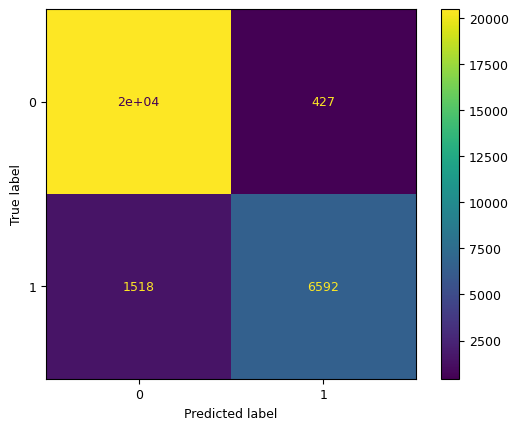

In [46]:
# Generate predictions using cross_val_predict
y_test_pred = voting_clf.predict(X_test)

plt.rc('font', size=9)  # extra code – make the text smaller

# Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report


# Print the classification metrics
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.93      0.98      0.95     20912
           1       0.94      0.81      0.87      8110

    accuracy                           0.93     29022
   macro avg       0.94      0.90      0.91     29022
weighted avg       0.93      0.93      0.93     29022



In [48]:
from sklearn.mixture import BayesianGaussianMixture
'''
gm = BayesianGaussianMixture(n_components=100, n_init=10,random_state=42,covariance_type='spherical')
gm.fit(X_train)
'''

from sklearn.mixture import BayesianGaussianMixture
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_components': [10],  # example range for 'n_components'
    'covariance_type': ['full', 'spherical'],
    'n_init': [20],
    'max_iter': [200,300]}

# Initialize the BayesianGaussianMixture
gm = BayesianGaussianMixture(n_init=10, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(gm, param_grid, cv=5, verbose=1)

# Fit GridSearchCV to the data
grid_search.fit(X_train)

# Get the best combination of parameters
best_params = grid_search.best_params_

# Train the best model
best_gm = BayesianGaussianMixture(**best_params)
best_gm.fit(X_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [1]:

'''
# Assume 'X' is your dataframe of features and 'gm' is a fitted GaussianMixture model
# We'll add the cluster assignments as a column to the dataframe.
cluster_labels = gm.predict(X_train)
X_clustered = X_train.copy()
X_clustered['Cluster'] = cluster_labels

# Convert the target 'y' to a dataframe and concatenate it with the features for plotting
y_df = pd.DataFrame(y_train, columns=['Popularity'])
X_clustered = pd.concat([X_clustered, y_df], axis=1)

# Create a pair plot
sns.pairplot(X_clustered, hue='Cluster', vars=X.columns)
plt.show()
'''

"\n# Assume 'X' is your dataframe of features and 'gm' is a fitted GaussianMixture model\n# We'll add the cluster assignments as a column to the dataframe.\ncluster_labels = gm.predict(X_train)\nX_clustered = X_train.copy()\nX_clustered['Cluster'] = cluster_labels\n\n# Convert the target 'y' to a dataframe and concatenate it with the features for plotting\ny_df = pd.DataFrame(y_train, columns=['Popularity'])\nX_clustered = pd.concat([X_clustered, y_df], axis=1)\n\n# Create a pair plot\nsns.pairplot(X_clustered, hue='Cluster', vars=X.columns)\nplt.show()\n"

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'cluster_labels' is a NumPy array with the cluster assignments.
# Assuming 'X' is a pandas DataFrame that includes 'danceability' feature.
cluster_labels = best_gm.fit(X_train)

# Count the number of elements in each cluster
unique_clusters, counts = np.unique(cluster_labels, return_counts=True)
cluster_counts = dict(zip(unique_clusters, counts))
print(f"Number of elements in each cluster: {cluster_counts}")

# Add the cluster labels to your dataframe
X_train['Cluster'] = cluster_labels

# Create a grid of histograms
plt.figure(figsize=(12, 6))
sns.histplot(data=X_train, x='duration_ms', hue='Cluster', element='step', palette='tab10', common_norm=False)

plt.title('tempo Distribution Across Clusters')
plt.xlabel('duration_ms')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()

NameError: name 'best_gm' is not defined

In [ ]:
best_gm.score

<bound method BaseMixture.score of BayesianGaussianMixture(max_iter=150, n_components=10, n_init=15)>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'cluster_labels' is a NumPy array or list with the cluster assignments
# Assuming 'X' is a pandas DataFrame that includes 'danceability'

# Get unique clusters and their counts
clusters, counts = np.unique(cluster_labels, return_counts=True)
cluster_counts = dict(zip(clusters, counts))

# Plot the distribution of 'danceability' for each individual cluster
# and include the total number of elements in the title of each plot
for cluster in clusters:
    plt.figure(figsize=(8, 4))
    sns.histplot(X_train.loc[cluster_labels == cluster, 'duration_ms'], kde=True, bins=20)
    plt.title(f'Cluster {cluster} tempo Distribution - {cluster_counts[cluster]} Elements')
    plt.xlabel('duration_ms')
    plt.ylabel('Count')
    plt.show()

KeyError: True

<Figure size 800x400 with 0 Axes>

In [ ]:
# Define the clusters to be removed

clusters_to_remove = [3,6]

# Create a boolean mask for rows where the cluster label is not in the clusters to remove
mask = ~np.isin(cluster_labels, clusters_to_remove)

# Apply mask to 'X' and 'y' to filter out the rows
X_filtered = X_train[mask]
y_filtered = y_train[mask]
cluster_labels_filtered = cluster_labels[mask]

# Verify the filtered data
X_filtered.shape, y_filtered.shape, np.unique(cluster_labels_filtered)



((55611, 13),
 (55611,),
 array([ 1,  2,  4,  5,  7,  8,  9, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22,
        23, 24, 25, 28, 30, 31, 34, 35, 38, 40, 43, 44, 46, 47, 48, 49, 52,
        54, 55, 59, 60, 61, 62, 63, 64, 67, 70, 72, 73, 74, 75, 76, 77, 78,
        81, 83, 86, 87, 88, 90, 91, 92, 95]))

In [ ]:
rf_model=rf_pipe.fit(X_filtered,y_filtered)

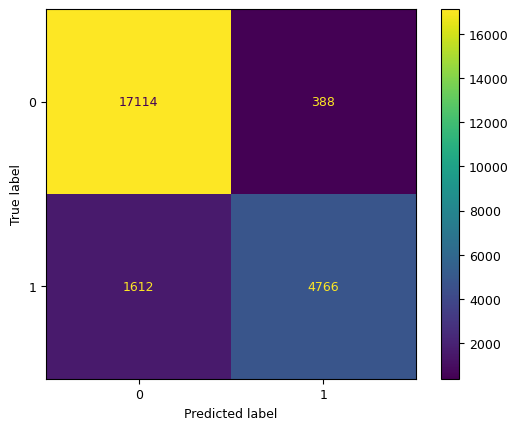

In [ ]:
# Generate predictions using cross_val_predict
y_test_pred1 = rf_model.predict(X_test)

plt.rc('font', size=9)  # extra code – make the text smaller

# Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred1)
plt.show()

In [ ]:
print(classification_report(y_test, y_test_pred1))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     17502
           1       0.92      0.75      0.83      6378

    accuracy                           0.92     23880
   macro avg       0.92      0.86      0.89     23880
weighted avg       0.92      0.92      0.91     23880



In [ ]:
rf_model_normaldata=rf_pipe.fit(X_train,y_train)

KeyboardInterrupt: 

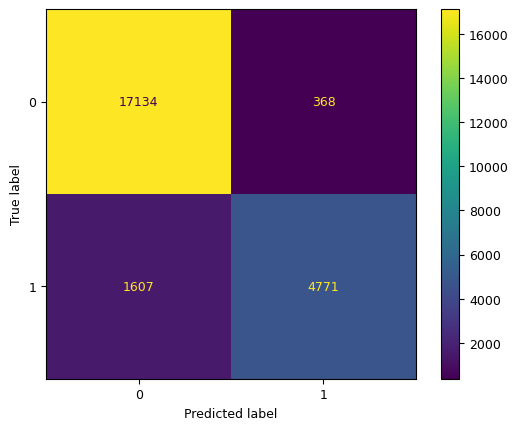

In [ ]:
# Generate predictions using cross_val_predict
y_test_pred2 = rf_model_normaldata.predict(X_test)

plt.rc('font', size=9)  # extra code – make the text smaller

# Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred2)
plt.show()

In [ ]:
print(classification_report(y_test, y_test_pred2))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     17502
           1       0.93      0.75      0.83      6378

    accuracy                           0.92     23880
   macro avg       0.92      0.86      0.89     23880
weighted avg       0.92      0.92      0.91     23880

